<a href="https://colab.research.google.com/github/inaldolourenco/projetos/blob/master/analise_pressao_atmosferica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#importando o nosso dataset
from google.colab import files
uploaded = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [3]:
#lendo o dataset para o formato de dataframe
df_poluicao_beijing=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
#conhecendo o dataset
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
#verificando o shape do dataset  / linhas 43824, colunas 13
df_poluicao_beijing.shape

(43824, 13)

In [7]:
#verificando o formato do dataset
df_poluicao_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
#contando valores nulos / a maioria das colunas não possuem valores nulos apenas a pm2.5 possui 2067
df_poluicao_beijing.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [10]:
#obtendo os dados em formato de datetime / aplica a função lambda para realizar o agrupamento na coluna datetime
df_poluicao_beijing['datetime']=df_poluicao_beijing[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'],month=row['month'], day=row['day'],hour=row['hour']), axis=1)

In [11]:
#mostrando a modificação
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [12]:
#encontrando as datas máximas e mínimas do dataset
print('Data inicial de coleta',df_poluicao_beijing['datetime'].min())
print('Data final de coleta',df_poluicao_beijing['datetime'].max())

Data inicial de coleta 2010-01-01 00:00:00
Data final de coleta 2014-12-31 23:00:00


In [14]:
df_pressao_atmosferica=df_poluicao_beijing[['datetime','PRES']] #pressão em hPa  (hectopascal)
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [17]:
#Função sort_values realiza o ordenamento dos dados
df_pressao_atmosferica.sort_values('datetime', ascending=True, inplace=True) #ordenando os valores pela data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#confirma a ordenação dos dados
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot para a Pressão Atmosférica')

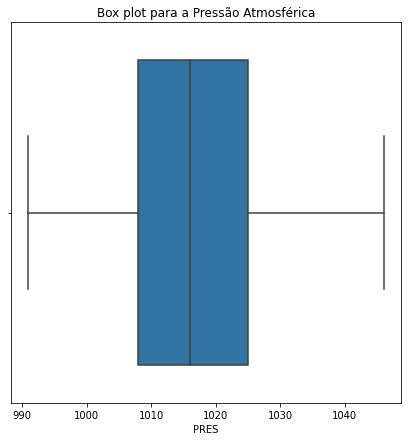

In [19]:
#verificando possíveis outlier com o boxplot / dados coletados através de sensores / caso tivesse outlier precisaria analisar os dados
plt.figure(figsize=(7, 7))
g = sns.boxplot(df_pressao_atmosferica['PRES'])
g.set_title('Box plot para a Pressão Atmosférica')

Text(0, 0.5, 'Pressão Atmosférica em hPa')

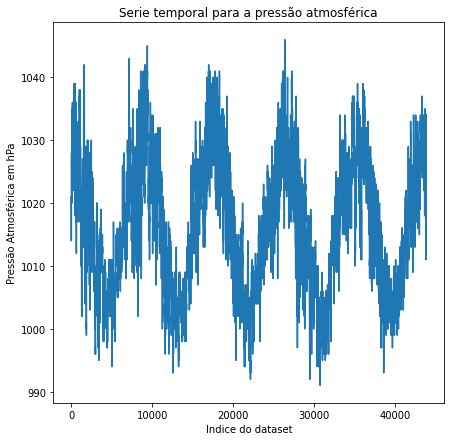

In [20]:
#plotando os valores de pressão atmosférica
plt.figure(figsize=(7, 7))
g = sns.lineplot(x=df_pressao_atmosferica.index,y=df_pressao_atmosferica['PRES'])
g.set_title('Serie temporal para a pressão atmosférica')
g.set_xlabel('Indice do dataset')
g.set_ylabel('Pressão Atmosférica em hPa')

**Preparando os dados para serem utilizados no modelo de previsão via MLP**

In [27]:
from sklearn.preprocessing import MinMaxScaler  #aplicando a normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))  #define o intervalor entre 0 e 1 para os dados serem normalizados
df_pressao_atmosferica['PRES_normalizado'] = scaler.fit_transform(np.array(df_pressao_atmosferica['PRES']).reshape(-1, 1)) # passa dus dimensoes 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#os valores normalizados passam para -1 a 1
df_pressao_atmosferica.head()

,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.545455
1,2010-01-01 01:00:00,1020.0,0.527273
2,2010-01-01 02:00:00,1019.0,0.509091
3,2010-01-01 03:00:00,1019.0,0.509091
4,2010-01-01 04:00:00,1018.0,0.490909


In [29]:
#dividindo os dados entre treinamento e teste   jan/2010  a 01/01/2014 / treinamento 35064, 3 e testes 8760, 3
data_de_corte = datetime.datetime(year=2014, month=1, day=1, hour=0)  #difine a data de corte para 01/01/2014
df_treinamento = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime']<data_de_corte]
df_teste = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime']>=data_de_corte]
print('Quantidade de dados para treinamento:', df_treinamento.shape)
print('Quantidade de dados para teste:', df_teste.shape)

Quantidade de dados para treinamento: (35064, 3)
Quantidade de dados para teste: (8760, 3)


Text(0, 0.5, 'Leituras normalizadas')

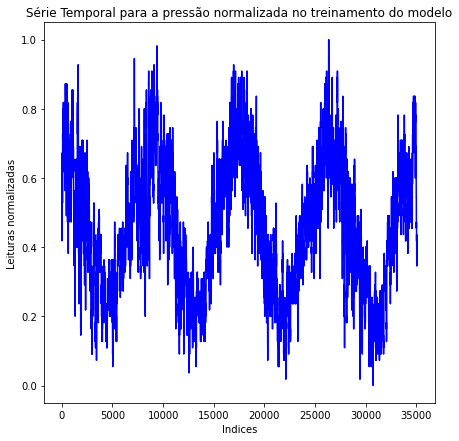

In [30]:
#verificando "a cara" dos dados de treinamento 
plt.figure(figsize=(7, 7))
g = sns.lineplot(x=df_treinamento.index,y=df_treinamento['PRES_normalizado'], color='b')
g.set_title('Série Temporal para a pressão normalizada no treinamento do modelo')
g.set_xlabel('Indices')
g.set_ylabel('Leituras normalizadas')

Text(0, 0.5, 'Leituras normalizadas')

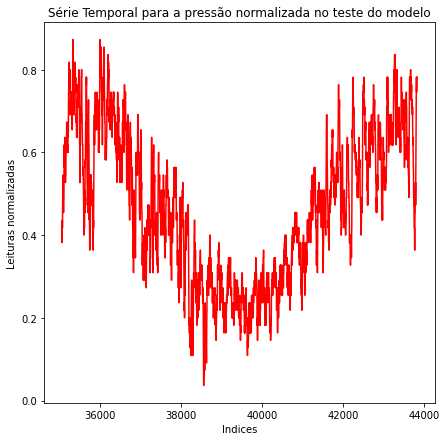

In [31]:
#verificando "a cara" dos dados de teste
plt.figure(figsize=(7, 7))
g = sns.lineplot(x=df_teste.index,y=df_teste['PRES_normalizado'], color='r')
g.set_title('Série Temporal para a pressão normalizada no teste do modelo')
g.set_xlabel('Indices')
g.set_ylabel('Leituras normalizadas')

In [36]:
#definindo o número de valores a serem utilizados para a previsão 
def formata_entrada_saida(serie_temporal_original, numero_de_passos):
    
    X = []
    y = []
    for i in range(numero_de_passos, serie_temporal_original.shape[0]):
        X.append(list(serie_temporal_original.loc[i-numero_de_passos:i-1]))
        y.append(serie_temporal_original.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y    # X valor de entrada , y valor de saida

In [37]:
#formata os dados para o treinamento do modelo
X_train, y_train = formata_entrada_saida(df_treinamento['PRES_normalizado'], 10) # 35054 linhas 10 entradas
print('Formato dos dados:', X_train.shape, y_train.shape)

Formato dos dados: (35054, 10) (35054,)


In [38]:
#plotoou 15 linhas
X_train[1:15,:]

array([[0.52727273, 0.50909091, 0.50909091, 0.49090909, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.50909091, 0.49090909, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.49090909, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.43636364],
       [0.49090909, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.43636364, 0.43636364],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.43636364, 0.43636364, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.43636364],
       [0.47272727, 0.47272727, 0.4727272

In [39]:
# procedimento relizado em testes semelhantes aos 10 passos da celular anterior 
X_teste, y_teste = formata_entrada_saida(df_teste['PRES_normalizado'].reset_index(drop=True),10)
print('Formato dos dados de normalizacao:', X_teste.shape, y_teste.shape)

Formato dos dados de normalizacao: (8750, 10) (8750,)


In [ ]:
X_teste[1:15,:]

array([[0.4       , 0.4       , 0.4       , 0.38181818, 0.38181818,
        0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364],
       [0.4       , 0.4       , 0.38181818, 0.38181818, 0.38181818,
        0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364],
       [0.4       , 0.38181818, 0.38181818, 0.38181818, 0.4       ,
        0.4       , 0.41818182, 0.43636364, 0.43636364, 0.43636364],
       [0.38181818, 0.38181818, 0.38181818, 0.4       , 0.4       ,
        0.41818182, 0.43636364, 0.43636364, 0.43636364, 0.41818182],
       [0.38181818, 0.38181818, 0.4       , 0.4       , 0.41818182,
        0.43636364, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364,
        0.43636364, 0.41818182, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.41818182, 0.4363636

**Inicia o processo de construção da Previsão via MLP**

In [41]:
#importando as bibliotecas 
import tensorflow as tf  #atuando no backend
from tensorflow.keras.layers import Dense, Input, Dropout  #define os tipos de camadas a serem utilizadas pelo modelo / camada Dropout retirar alguns neuronios possibilitando o modelo aprender novas caracteristicas
from tensorflow.keras.optimizers import SGD  #define o modelo de otimização via gradiente descendente

In [42]:
#define uma camada de entrada  Input com 10 entrada / MLP = conjunto de neuronios
camada_entrada = Input(shape=(10,), dtype='float32')  # não precisa definir o numero de instancias do modelo (,)

In [43]:
#adiciona as camadas escondidas / amarrando a saida à entrada anterior / função activation linear / pode alterar para testar
densa1 = Dense(32, activation='linear')(camada_entrada)
densa2 = Dense(16, activation='linear')(densa1)
densa3 = Dense(16, activation='linear')(densa2)

In [44]:
#adiciona a camada de dropout como forma de regularização do modelo (ajuda a evitar overfitting) / eliminando 2.0 dos neuronios
camada_dropout = Dropout(0.2)(densa3)

In [47]:
#camada de saída da rede (1 dimensão, pois queremos prever a pressão atmosférica baseada em valores anteriores)
camada_de_saida = Dense(1, activation='linear')(camada_dropout)

In [48]:
#definindo o modelo MLP
modelo_MLP = tf.keras.Model(inputs=camada_entrada, outputs=camada_de_saida)

In [49]:
#mostrando as características do modelo 
modelo_MLP.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
____________________________________________________

In [50]:
#definindo a função de erro e o otimizador a ser utilizado 
modelo_MLP.compile(loss='mean_squared_error', optimizer='adam')  #função perda MSE e otimizador de Adam

In [51]:
#treina o modelo / definido 20 epocas
modelo_MLP.fit(x=X_train, y=y_train, batch_size=16, epochs=20,verbose=1, shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 2s 1ms/step - loss: 0.0065
Epoch 2/20
2191/2191 [==============================] - 2s 1ms/step - loss: 0.0012
Epoch 3/20
2191/2191 [==============================] - 2s 1ms/step - loss: 8.7534e-04
Epoch 4/20
2191/2191 [==============================] - 2s 1ms/step - loss: 8.4066e-04
Epoch 5/20
2191/2191 [==============================] - 2s 1ms/step - loss: 8.0878e-04
Epoch 6/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.9930e-04
Epoch 7/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.8554e-04
Epoch 8/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.6919e-04
Epoch 9/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.6814e-04
Epoch 10/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.5524e-04
Epoch 11/20
2191/2191 [==============================] - 2s 1ms/step - loss: 7.6426e-04
Epoch 12/20
2191/2191 [==========================

In [53]:
#realiza a previsão com o modelo MLP /  transformação inversa dos dados com 8750 linhas e 1 coluna
previsao = modelo_MLP.predict(X_teste)
previsao_PRES = scaler.inverse_transform(previsao)  #aplica o inverso da transformação
previsao_PRES.shape

(8750, 1)

In [54]:
previsao_PRES = np.squeeze(previsao_PRES)  #remove entradas de uma dimensão
previsao_PRES.shape

(8750,)

In [55]:
from sklearn.metrics import r2_score  #importa o coeficiente de determinação

In [56]:
#modelo proximo de 1 / a partir de um modelo ele conseguiu prever corretamente
r2 = r2_score(df_teste['PRES'].iloc[10:], previsao_PRES)
print('Coeficiente de Determinação Para o Teste (MLP):', round(r2,4))

Coeficiente de Determinação Para o Teste (MLP): 0.9944


Text(0.5, 0, 'Indice')

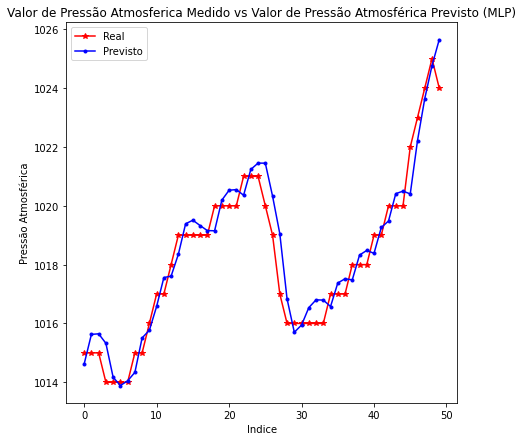

In [57]:
#plotando os valores reais x previstos
plt.figure(figsize=(7,7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle='-', marker='*', color='r')
plt.plot(range(50), previsao_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real','Previsto'], loc=2)
plt.title('Valor de Pressão Atmosferica Medido vs Valor de Pressão Atmosférica Previsto (MLP)')
plt.ylabel('Pressão Atmosférica')
plt.xlabel('Indice')

**Inciando o processo de previsão via CNN** Rede convulucionária

In [59]:
from tensorflow.keras.layers import Flatten  #camada flatten para transformar os dados em uma dimensão 
from tensorflow.keras.layers import ZeroPadding1D  #completa os dados após a convolução
from tensorflow.keras.layers import Conv1D  #camada de convolução  
from tensorflow.keras.layers import AveragePooling1D  #camada de redução (média dos dados encontrados)

In [60]:
#define a camada de entrada 
camada_entrada = Input(shape=(10,1), dtype='float32')

In [61]:
#adiciona a camada de padding
camada_padding = ZeroPadding1D(padding=1)(camada_entrada)  #matém a quantidade de dados

In [62]:
#adiona a camada de convolução 
camada_convolucao_1D = Conv1D(64, 3, strides=1, use_bias=True)(camada_padding) #adiciona 64 filtros com uma janela de convolução=3

In [63]:
#camada de pooling
camada_pooling = AveragePooling1D(pool_size=3, strides=1)(camada_convolucao_1D)  #reduz através do valor médio encontrado para a convolução (pode ser também o valor máximo)

In [64]:
#camada flatten
camada_flatten = Flatten()(camada_pooling) #utilizada para realizar o "reshape" dos dados para um vetor 

In [65]:
#adicionando a camada de dropout
camada_dropout_cnn = Dropout(0.2)(camada_flatten)

In [66]:
#camada de saída
camada_saida = Dense(1, activation='linear')(camada_dropout_cnn)

In [67]:
#contruindo o modelo
modelo_CNN = tf.keras.Model(inputs=camada_entrada, outputs=camada_saida)

In [68]:
#mostrando o modelo
modelo_CNN.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 12, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [69]:
#adionando a função perda e o otimizados
modelo_CNN.compile(loss='mean_absolute_error', optimizer='adam')

In [70]:
#Transforma os dados de treinamento e teste para o 3D, pois a rede CNN exige essa transformação
X_train, X_teste = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),X_teste.reshape((X_teste.shape[0], X_teste.shape[1], 1))
print('Formatos para o treinamento e teste:', X_train.shape, X_teste.shape)

Formatos para o treinamento e teste: (35054, 10, 1) (8750, 10, 1)


In [71]:
#realizando o treinamento do modelo
modelo_CNN.fit(x=X_train, y=y_train, batch_size=16, epochs=20,verbose=1,shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0294
Epoch 2/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0185
Epoch 3/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0161
Epoch 4/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0152
Epoch 5/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0145
Epoch 6/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0142
Epoch 7/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0140
Epoch 8/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0138
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0139
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0137
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0137
Epoch 12/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0136
E

In [72]:
#previsão CNN
previsao_cnn = modelo_CNN.predict(X_teste)
PRES_cnn = np.squeeze(scaler.inverse_transform(previsao_cnn))

In [73]:
r2_cnn = r2_score(df_teste['PRES'].iloc[10:], PRES_cnn)
print('Coeficiente de Determinação Para o Teste (CNN):', round(r2, 4))

Coeficiente de Determinação Para o Teste (CNN): 0.9944


Text(0.5, 0, 'Indice')

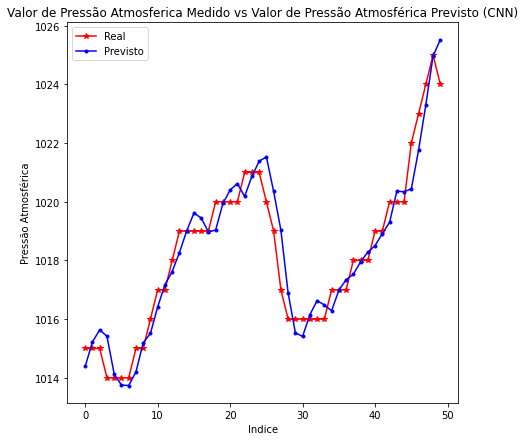

In [74]:
#plotando os valores reais x previstos
plt.figure(figsize=(7,7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle='-', marker='*', color='r')
plt.plot(range(50), PRES_cnn[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real','Previsto'], loc=2)
plt.title('Valor de Pressão Atmosferica Medido vs Valor de Pressão Atmosférica Previsto (CNN)')
plt.ylabel('Pressão Atmosférica')
plt.xlabel('Indice')